# Final Project for DCSI 100

In [9]:
library(tidyverse)
library(repr)
library(infer)
options(repr.matrix.max.rows = 6)

## Introduction

The `players.csv` dataset is from a Minecraft server by a research group, Pacific Laboratory for Artificial Intelligence, run by Frank Wood at UBC. They recorded some basic information about the players, such as their `Age`, `played_hours`, `experience`, `gender`, and their `name`, as well as whether or not they are `sunscribed` to their newsletter, etc. The goal of the project is to help AI in acting like a real Minecraft player. 

The question I will try to answer: Which variable, out of `Age`, `experience`, and `played_hours`  most effectively predicts if a player will `subscribe` to the newsletter?


In [11]:
players <- read_csv("players.csv")
# sessions <- read_csv("sessions.csv")

players
# sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


From the dataset above, there are 7 column variables, withthe following names:

`experience` (character): the player's skill level (listed as Amateur, Beginner, Regular, Pro, and Veteran)

`subscribe` (logical): if the player has subscribed to the game-related newsletter

`hashedEmail`(character): the player's unique identifier

`played_hours`(double): how many hours each player has played the game

`names`(character): name of each player

`gender`(character): gender of each player

`Age`(double): age of each player

There are 196 rows, each representing a single player observation, meaning that there are 196 observations.

## Methods & Results

Since our goal for this dataset is to find out which player characteristics and behaviours are most predictive of newsletter subscription, `subscribe` is out main categorical label (which we will also to convert into a factor). This logical variable has only two possibilities: `TRUE` (that they have subscribed) or `FALSE` (that they are not subscribed to the newsletter). We will also have to turn the experience label into a categorical label as it is currently a character variable, as the second part of the question asks how this feature varies between different player types.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


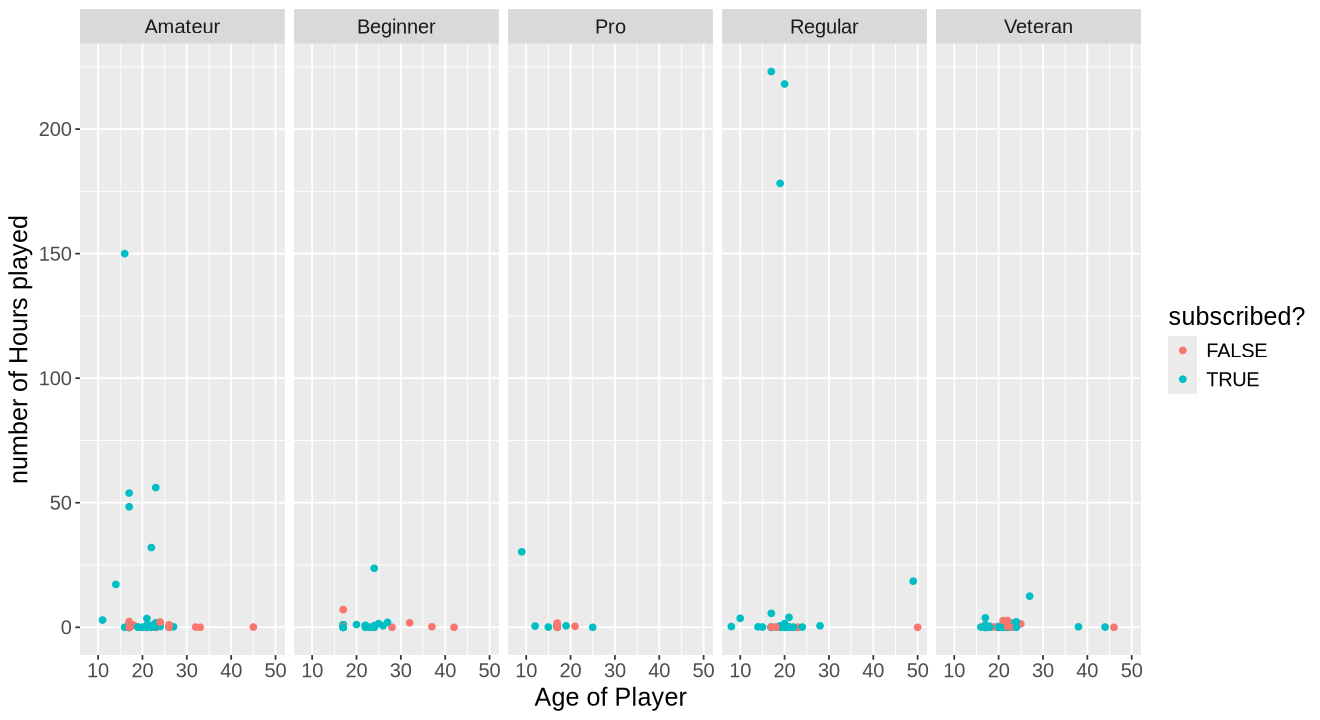

In [22]:
options(repr.plot.width = 11, repr.plot.height = 6)  
players_plot <- ggplot(players, aes(x=Age, y=played_hours))  + 
    geom_point(aes(colour = subscribe)) + 
    labs(colour = "subscribed?") + 
    xlab("Age of Player") +  
    ylab("number of Hours played") + 
    facet_grid(cols = vars(experience)) + 
    theme(text = element_text(size = 15)) 
players_plot